In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

# **Read CSV:**

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/CSE303/project303/Crop_recommendation.csv")
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In this dataset, the columns labeled N, P, and K represent the levels of nitrogen, phosphorus, and potassium in the soil, respectively. These are essential nutrients that significantly impact plant growth. The data provided for each of these elements helps in understanding the soil's fertility and its ability to support various types of agricultural crops. Analyzing these values can assist in agricultural planning and management by determining the need for fertilization to optimize crop yields.

In [ ]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
#finding missing values
dataset.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<Axes: >

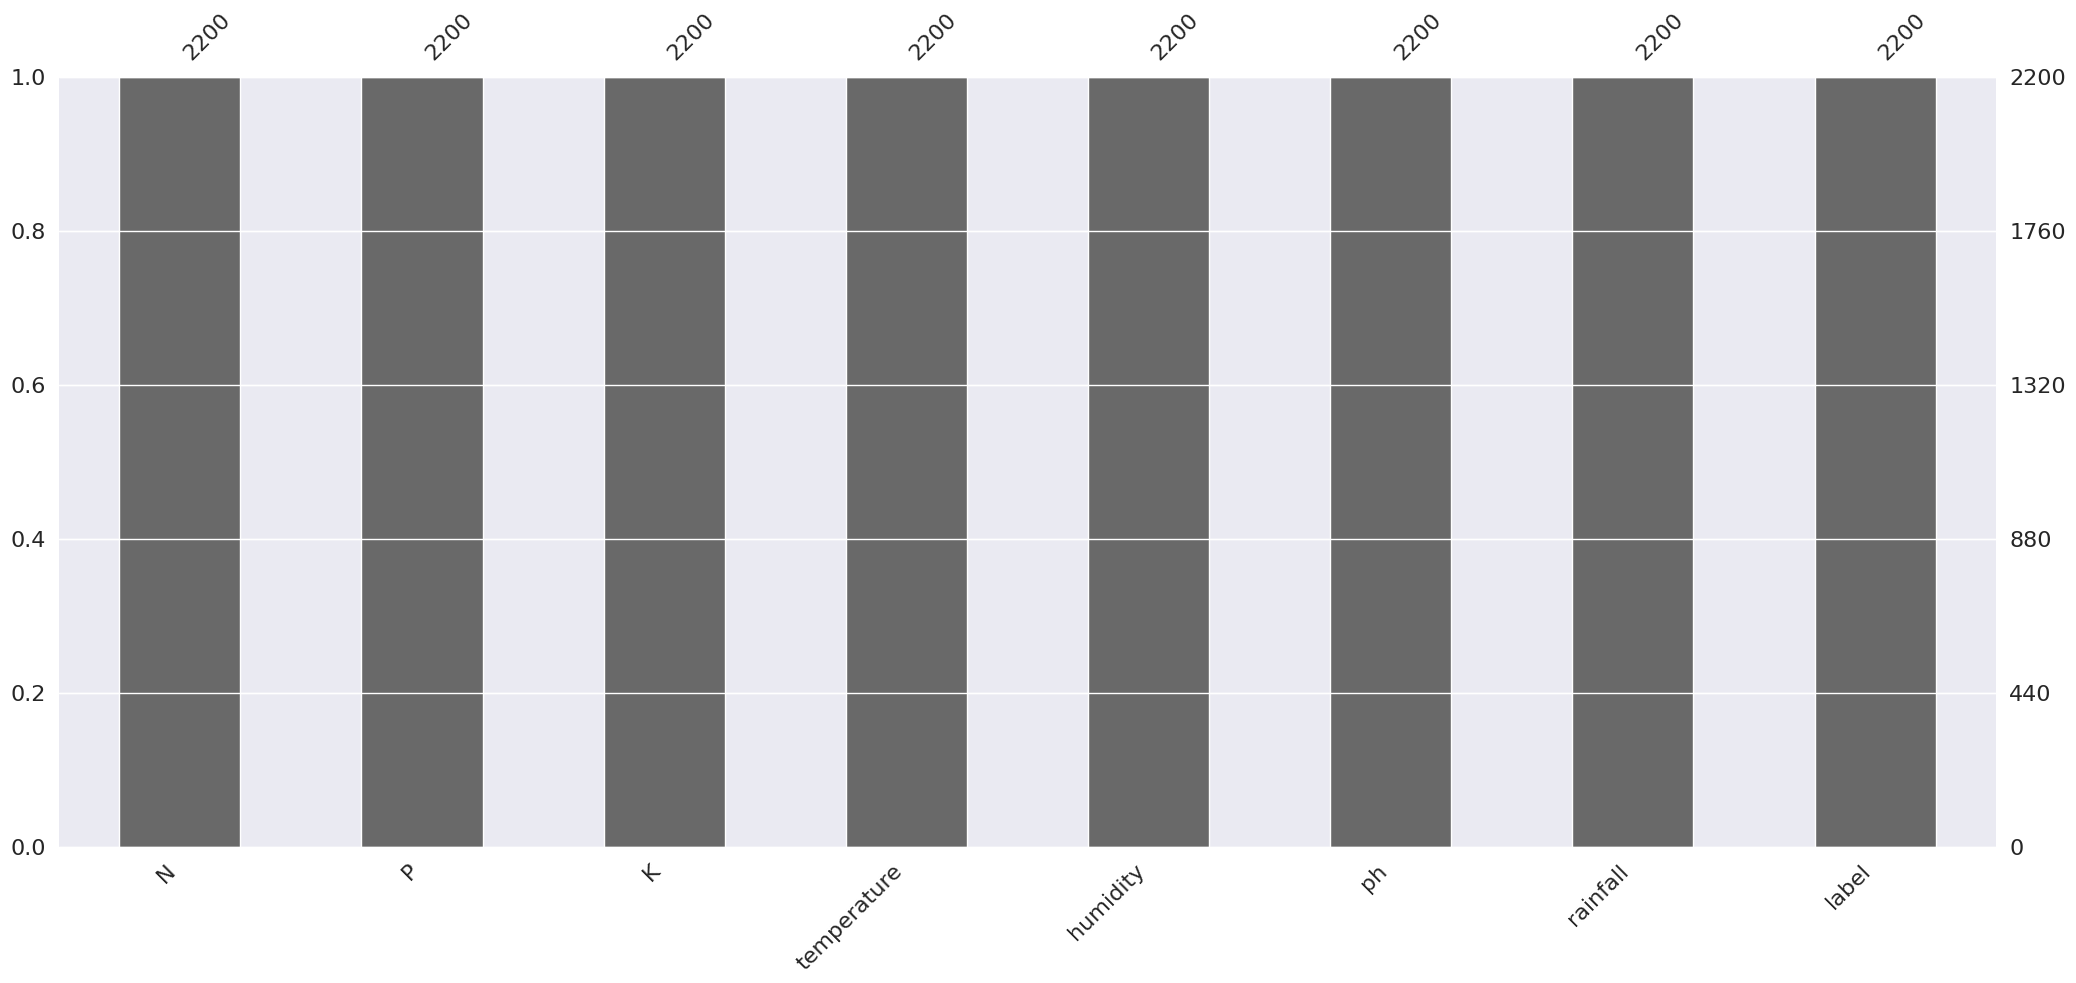

In [ ]:
#visualization of missing values
import missingno as msno
msno.bar(dataset)

After reviewing the dataset and visualizing the data, it is confirmed that there are no missing (null) values present. Therefore, we do not need to perform any handling or imputation for missing data in this case.

In [ ]:
#finding the unique value for column label
df_copy=dataset.copy()
df_copy['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


The label output from the dataset indicates a variety of agricultural crops, such as staples like rice and maize, fruits such as apples, and legumes including lentils, each assigned a label value of 100. This consistency in label values across all crops suggests that each crop type is represented by an equal number of samples or records 100 per category. The uniformity in distribution implies that the dataset is balanced, allowing for equitable representation of each crop, which aids in conducting unbiased analyses or training models effectively using this data.

# **Correlation Matrix:**

In [ ]:
#mapping the label data
df_copy['label'].replace(['rice','maize','jute','cotton','coconut','papaya','orange','apple','muskmelon','watermelon','grapes','mango','banana','pomegranate','lentil','blackgram','mungbean','mothbeans','pigeonpeas','kidneybeans','chickpea','coffee'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22], inplace=True)
correlation = df_copy.corr()


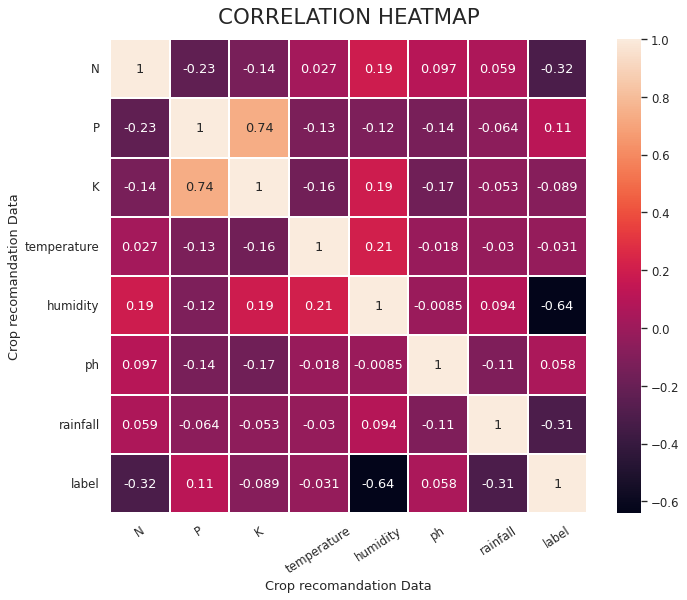

In [ ]:
#Corelation Matrix

plt.figure(figsize=(10,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation heatmap'.upper(), size=20, pad=15)
plt.xlabel('Crop recomandation Data')
plt.ylabel('Crop recomandation Data')
plt.xticks(rotation=33)
plt.show()

 **Correlation Matrix:**

Phosphorus (P) and Potassium (K) have a strong positive correlation (0.74), while humidity and the label have a notable negative correlation (-0.64). On the other hand, the relationships between N and the label (-0.32) and rainfall (-0.31) show moderate negative correlations.

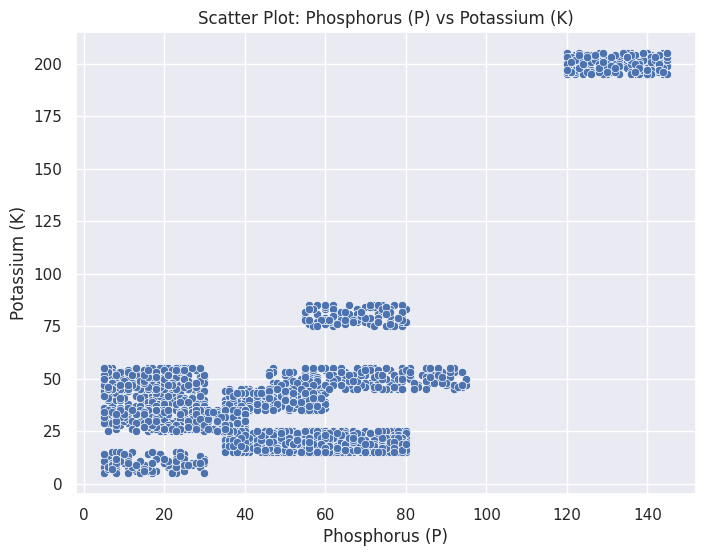

In [ ]:
# Scatter plot for Phosphorus (P) vs Potassium (K)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P', y='K', data=dataset)
plt.title('Scatter Plot: Phosphorus (P) vs Potassium (K)')
plt.xlabel('Phosphorus (P)')
plt.ylabel('Potassium (K)')
plt.show()

**Scatter plot :**

The scatter plot depicts the relationship between Phosphorus (P) and Potassium (K) levels in the dataset. The data points are grouped into several clusters, indicating distinct ranges of values for both P and K. Most of the points are concentrated between lower Phosphorus values (below 40) and Potassium values ranging from 0 to around 50, with additional clusters at higher P levels (around 140) corresponding to K values near 200. This plot suggests that there are distinct groupings or categories of observations, but no clear linear relationship between Phosphorus and Potassium is immediately evident from this scatter plot.

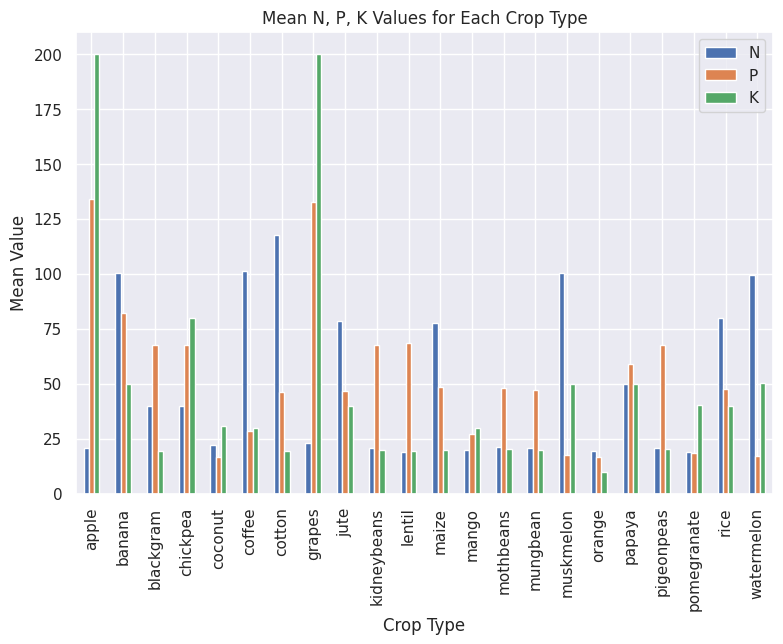

In [ ]:
# Bar chart for mean N, P, K values by crop type
mean_values = dataset.groupby('label')[['N', 'P', 'K']].mean()
mean_values.plot(kind='bar', figsize=(9, 6))
plt.title('Mean N, P, K Values for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.show()


The bar chart compares the mean values of Nitrogen (N), Phosphorus (P), and Potassium (K) across different crop types. Each crop type has three bars representing the average levels of N (blue), P (orange), and K (green). Certain crops, like **grapes** and **cotton**, have significantly higher mean values of Potassium (K), while others, such as **apple** and **banana**, show elevated levels of Nitrogen (N) and Phosphorus (P). The chart highlights how nutrient requirements vary significantly between crops, with some crops showing more balanced nutrient needs, while others have a strong dominance of one nutrient.

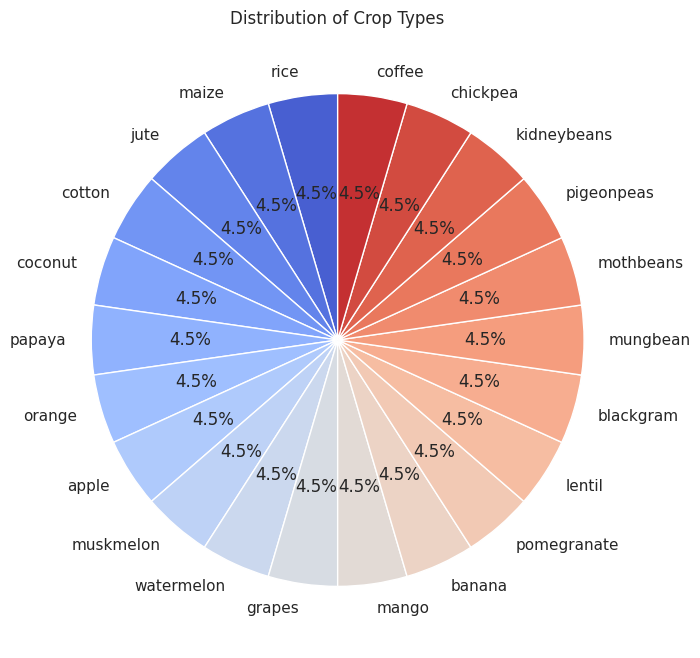

In [ ]:
# Pie chart for crop type distribution
crop_counts = dataset['label'].value_counts()

plt.figure(figsize=(9,8))
crop_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(crop_counts)))
plt.title('Distribution of Crop Types')
plt.ylabel('')
plt.show()


The image is a pie chart showing the distribution of different crop types, where each crop occupies an equal 4.5% portion of the circle. The crops are arranged in segments and labeled accordingly, with color variations. Some examples of the crops represented include rice, maize, coffee, chickpea, lentil, mango, apple, and more. This suggests that the data reflects a balanced distribution across a variety of crop types without any single crop dominating the chart.

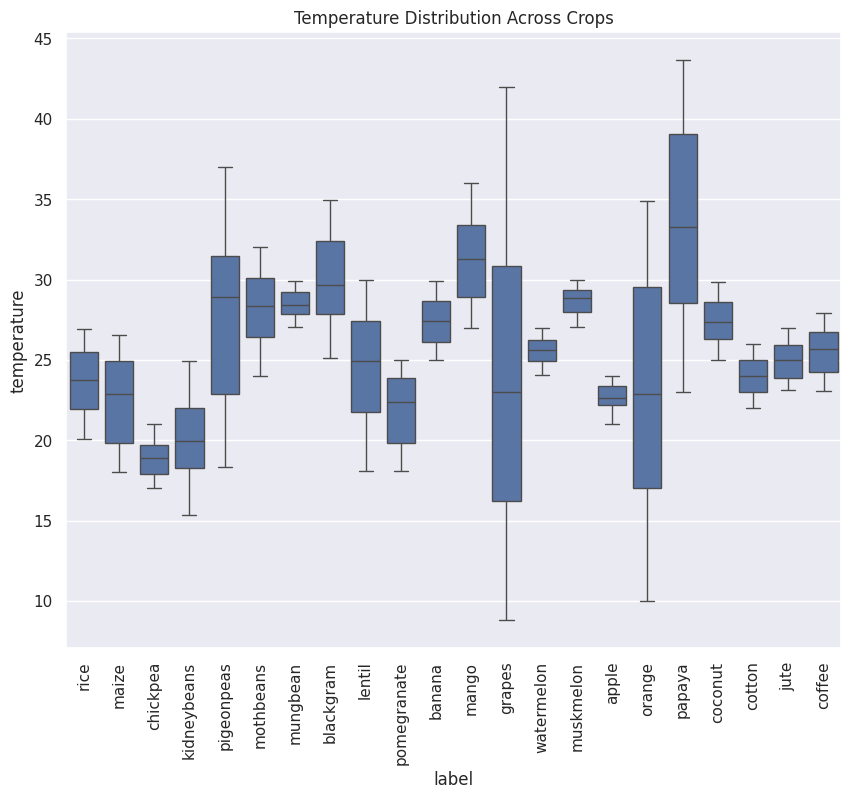

In [ ]:
# Box plot for temperature across crop types
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='temperature', data=dataset)
plt.title('Temperature Distribution Across Crops')
plt.xticks(rotation=90)
plt.show()

The image shows a boxplot graph representing the temperature distribution across different crop types. Each boxplot illustrates the range, quartiles, and median temperatures at which each crop thrives. The whiskers indicate the full range of data, and the boxes show the interquartile range (IQR). For instance, crops like grapes and mango have wider temperature ranges, whereas crops like chickpea and mungbean have narrower ranges. The graph helps to visualize the optimal and range of temperatures for each crop.

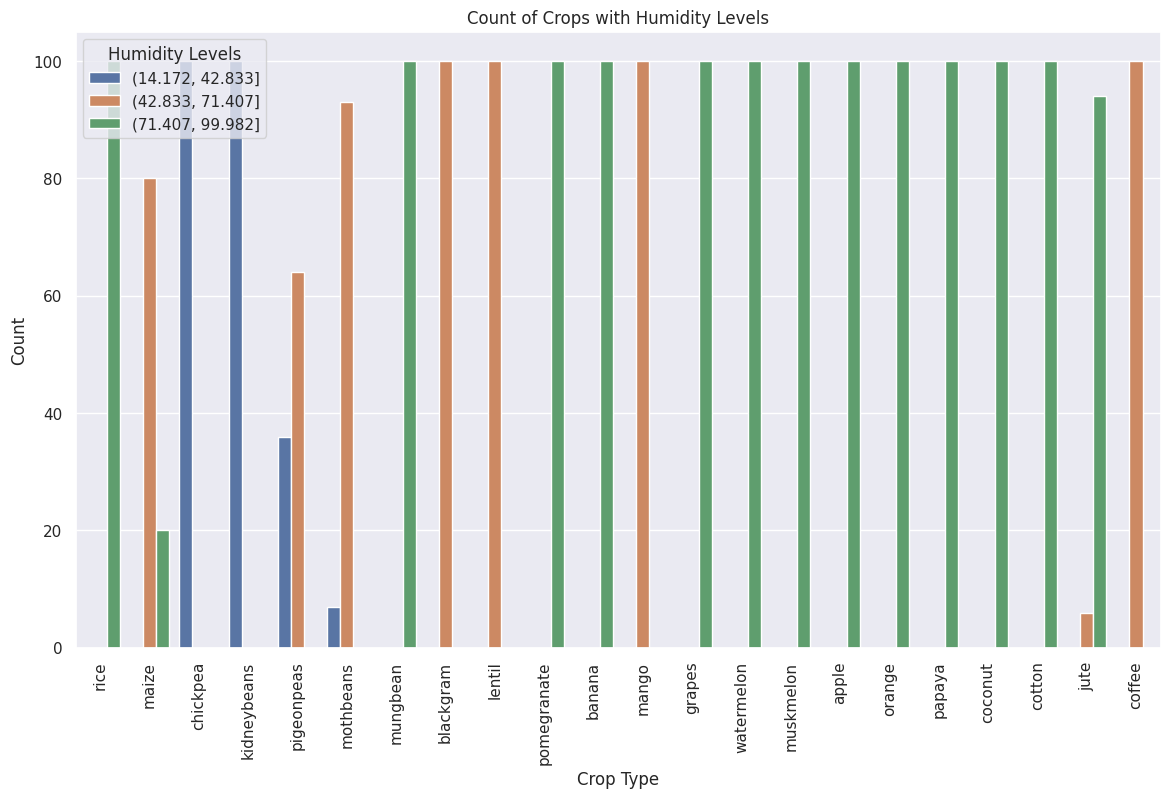

In [ ]:
# Generate the count plot of humidity levels
plt.figure(figsize=(14, 8))
sns.countplot(x='label', hue=pd.cut(dataset['humidity'], bins=3), data=dataset)
plt.title('Count of Crops with Humidity Levels')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Humidity Levels')
plt.show()

The image is a bar chart showing the count of different crops based on three humidity levels, categorized into ranges: (14.172, 42.833], (42.833, 71.407], and (71.407, 99.982]. Each bar represents a crop, and the colors indicate which humidity range the crop thrives in. For example, rice, banana, and mango thrive in higher humidity (green bars), while chickpea and kidney beans are more suited to lower humidity (blue and brown bars). This visualization helps understand how different crops are distributed across varying humidity levels.

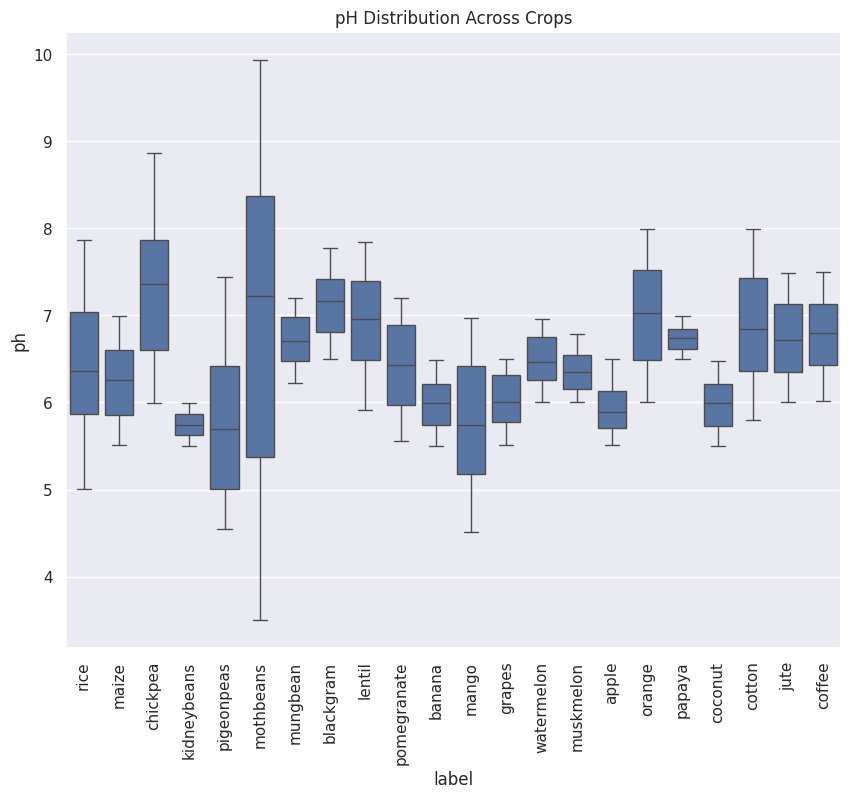

In [ ]:
# Box plot for pH across crop types
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='ph', data=dataset)
plt.title('pH Distribution Across Crops')
plt.xticks(rotation=90)
plt.show()

The box plot visualizes the pH distribution across different crops. The x-axis represents the crop labels, while the y-axis indicates the pH values. Each box represents the interquartile range (IQR), with the median pH value marked by the horizontal line within the box. The whiskers extend to the minimum and maximum values excluding outliers, which are plotted as individual points. The plot reveals that the pH values vary significantly among different crops, with some crops, like rice and maize, tending to have higher pH levels compared to others like grapes and watermelon. Additionally, the presence of outliers suggests that there are some extreme pH values within certain crop categories. Overall, the box plot provides a clear overview of the pH distribution across the studied crops.

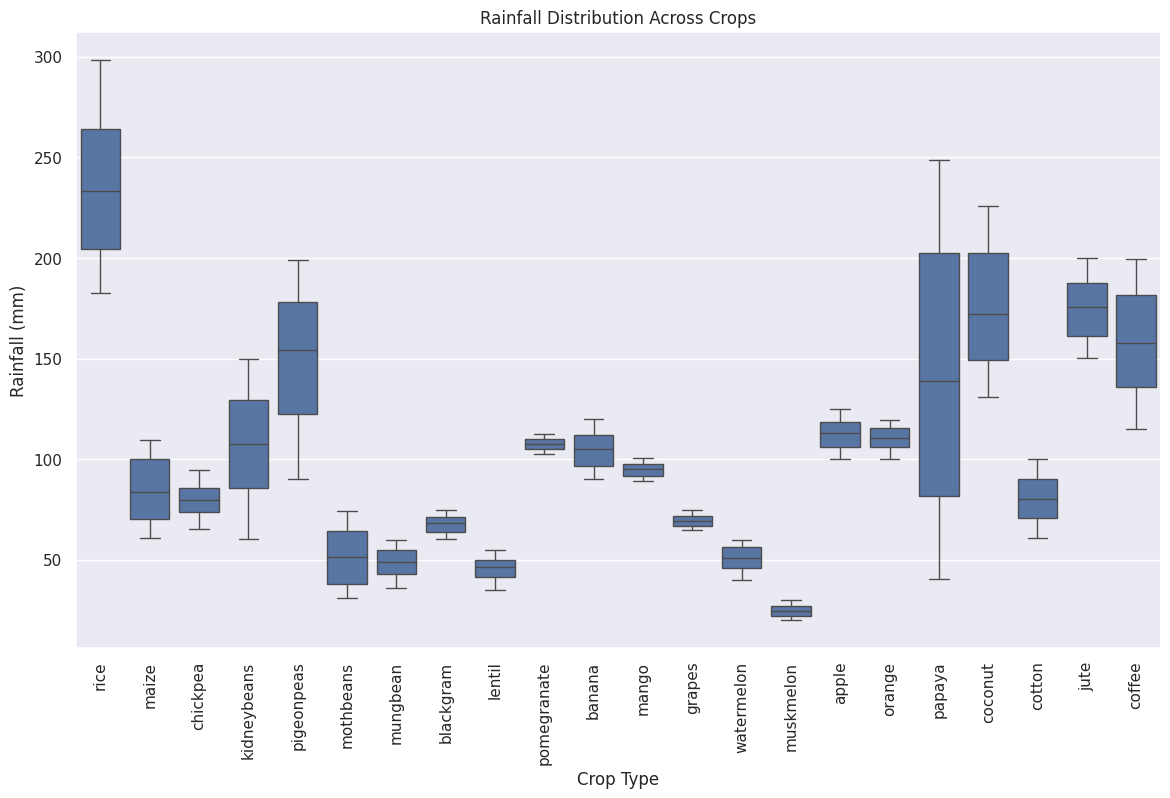

In [ ]:
# Box plot for Rainfall across Crop Types
plt.figure(figsize=(14, 8))
sns.boxplot(x='label', y='rainfall', data=dataset)
plt.title('Rainfall Distribution Across Crops')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=90)
plt.show()


The box plot illustrates rainfall distribution across various crops, with crop types on the x-axis and rainfall in millimeters on the y-axis. Each box displays the interquartile range (IQR) of rainfall, with the median marked inside the box. Whiskers show the range excluding outliers, which appear as individual points. This visualization highlights the diverse rainfall needs among crops, noting particularly high requirements for crops like rice and maize compared to grapes and watermelon. The presence of outliers indicates extreme variations in rainfall needs for certain crops. Overall, this plot provides a concise summary of how rainfall varies among different agricultural crops.

**Machine Learning Model**

In [ ]:
df_c=df_copy.copy()

df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [ ]:

x=df_c.drop('label',axis=1)
y=df_c['label']

In [ ]:
# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

        N   P   K  temperature   humidity        ph    rainfall
52     93  56  42    23.857240  82.225730  7.382763  195.094831
1354   82  25  51    24.313350  87.474091  6.074210   48.112484
1655    4   6   7    23.010143  91.117642  6.708890  112.673830
360     7  63  24    22.954582  24.035531  5.858618  107.731539
1609   13  23   6    23.961476  90.264080  7.365338  102.695870
...   ...  ..  ..          ...        ...       ...         ...
1033  102  71  48    28.654563  79.286937  5.695268  102.463378
1731   34  68  51    27.347349  94.177567  6.687088   40.351531
763    35  64  15    28.474423  63.536045  6.500145   69.527441
835    39  65  23    25.434598  69.126134  7.685959   41.026829
1653   14  22   9    17.249446  91.137728  6.543192  112.509052

[1540 rows x 7 columns]
52       1
1354    10
1655     7
360     20
1609     7
        ..
1033    13
1731     6
763     16
835     15
1653     7
Name: label, Length: 1540, dtype: int64
        N    P    K  temperature   humidity   

In [ ]:
#model with default parameter
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(reg.coef_)

print(reg.intercept_)

[[ 2.78502609e-01 -2.50783097e-01 -2.95834493e-01 -5.67560003e-01
  -6.18406807e-02 -1.72912435e-01  4.45843227e-01]
 [ 6.10729831e-01 -8.54796176e-02 -4.09193890e-01  5.78397870e-02
  -8.81866845e-02  6.08845142e-02  1.30312357e-01]
 [ 2.56975954e-01 -2.07312428e-01 -1.19995592e-03 -1.29787539e-01
  -1.06415906e-01  7.19734545e-02  3.41286658e-01]
 [ 7.86046949e-01 -1.78826402e-01 -7.25211046e-01 -2.30482717e-01
   7.40142908e-02 -3.23056219e-02 -4.25152444e-03]
 [-4.55791402e-01 -7.40295679e-01 -1.89039770e-01 -1.02018274e-01
   4.46264922e-01 -6.06642798e-02  4.11039526e-01]
 [-3.29848093e-01  1.15139601e-01  4.94934220e-01 -2.64580198e-01
   1.32614833e-01 -3.09803400e-01  2.50033070e-01]
 [-4.32972679e-01 -5.49075141e-01 -6.83429962e-01 -3.37242807e-02
   6.85053077e-01  5.38681301e-02  2.69828240e-01]
 [-6.57687865e-01  3.21239036e-01  1.17553589e+00 -2.76004043e-01
  -2.74630232e-01 -7.91261391e-02 -3.57883820e-01]
 [ 7.28939821e-01 -4.78291425e-01  1.61025773e-01  9.64637936e-0

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [ ]:
y_pred1 = reg.predict(x_test)
print(y_pred1)

[10 10 11 21 16  3 18 20  9 13 18 22 15 17 12  8 22 15 22 12  5 16 20  3
  4 22 15  7 18 20 14  1  2  9  5  4 12 12 10 18  2 16 19 10 19 17 20 20
  4 17 18 16  8  9 19 13  6 12 15  4  7 17 10  1  9  8 11 22  8  7  5 14
 20  2 11 18 21  2  3 12  1 18 10 10  9  4  2 15 16  6 16  3 17 11 17  2
 22  3 15 21  7  3 17 13 13  1 10 22 19  9  9 12 22 11  7 14 17 15  2  3
 14 15  7 21 21 16 14  7 21  6 18 16  9 17  4 17  5 14  7 16 15 11  8 22
 21  8  3 12 10  6  7  5 18 13 14 21 10  2  8  3 15 19  3 20 20  9  1  9
 13  7 19  8 18  5  4 17 20 14  6  7  1  6 18 19 20 13  5 19  1  6  2  3
 18  1  2 22 19  5 21 12  5 14  4 18 19  7  9  2 19 13 21 16 19  7 18 17
 12  6  9 14  3  1 16  6 16 22  2 22  7  1 18 17  7 20 14  5 12 17  4  1
 21 17  8 19 18  1 10 16 14  7  2 11 21 19  3 18 14 22 12 18  3 10 14  1
 11  5  3 15 21 22 22  6 14  2  1 21 19  7 14 19  5 20 14  9 18 12 15 13
 16 12 20 12  4 17  6 11 11 19  6  3  1 21  9 22 10  3  3 18 11  9 16 18
 18 21 16 12 13 12 14  3  7  9 21 15  4  6 11 20 15

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.95

# **Confusion Matrix:**

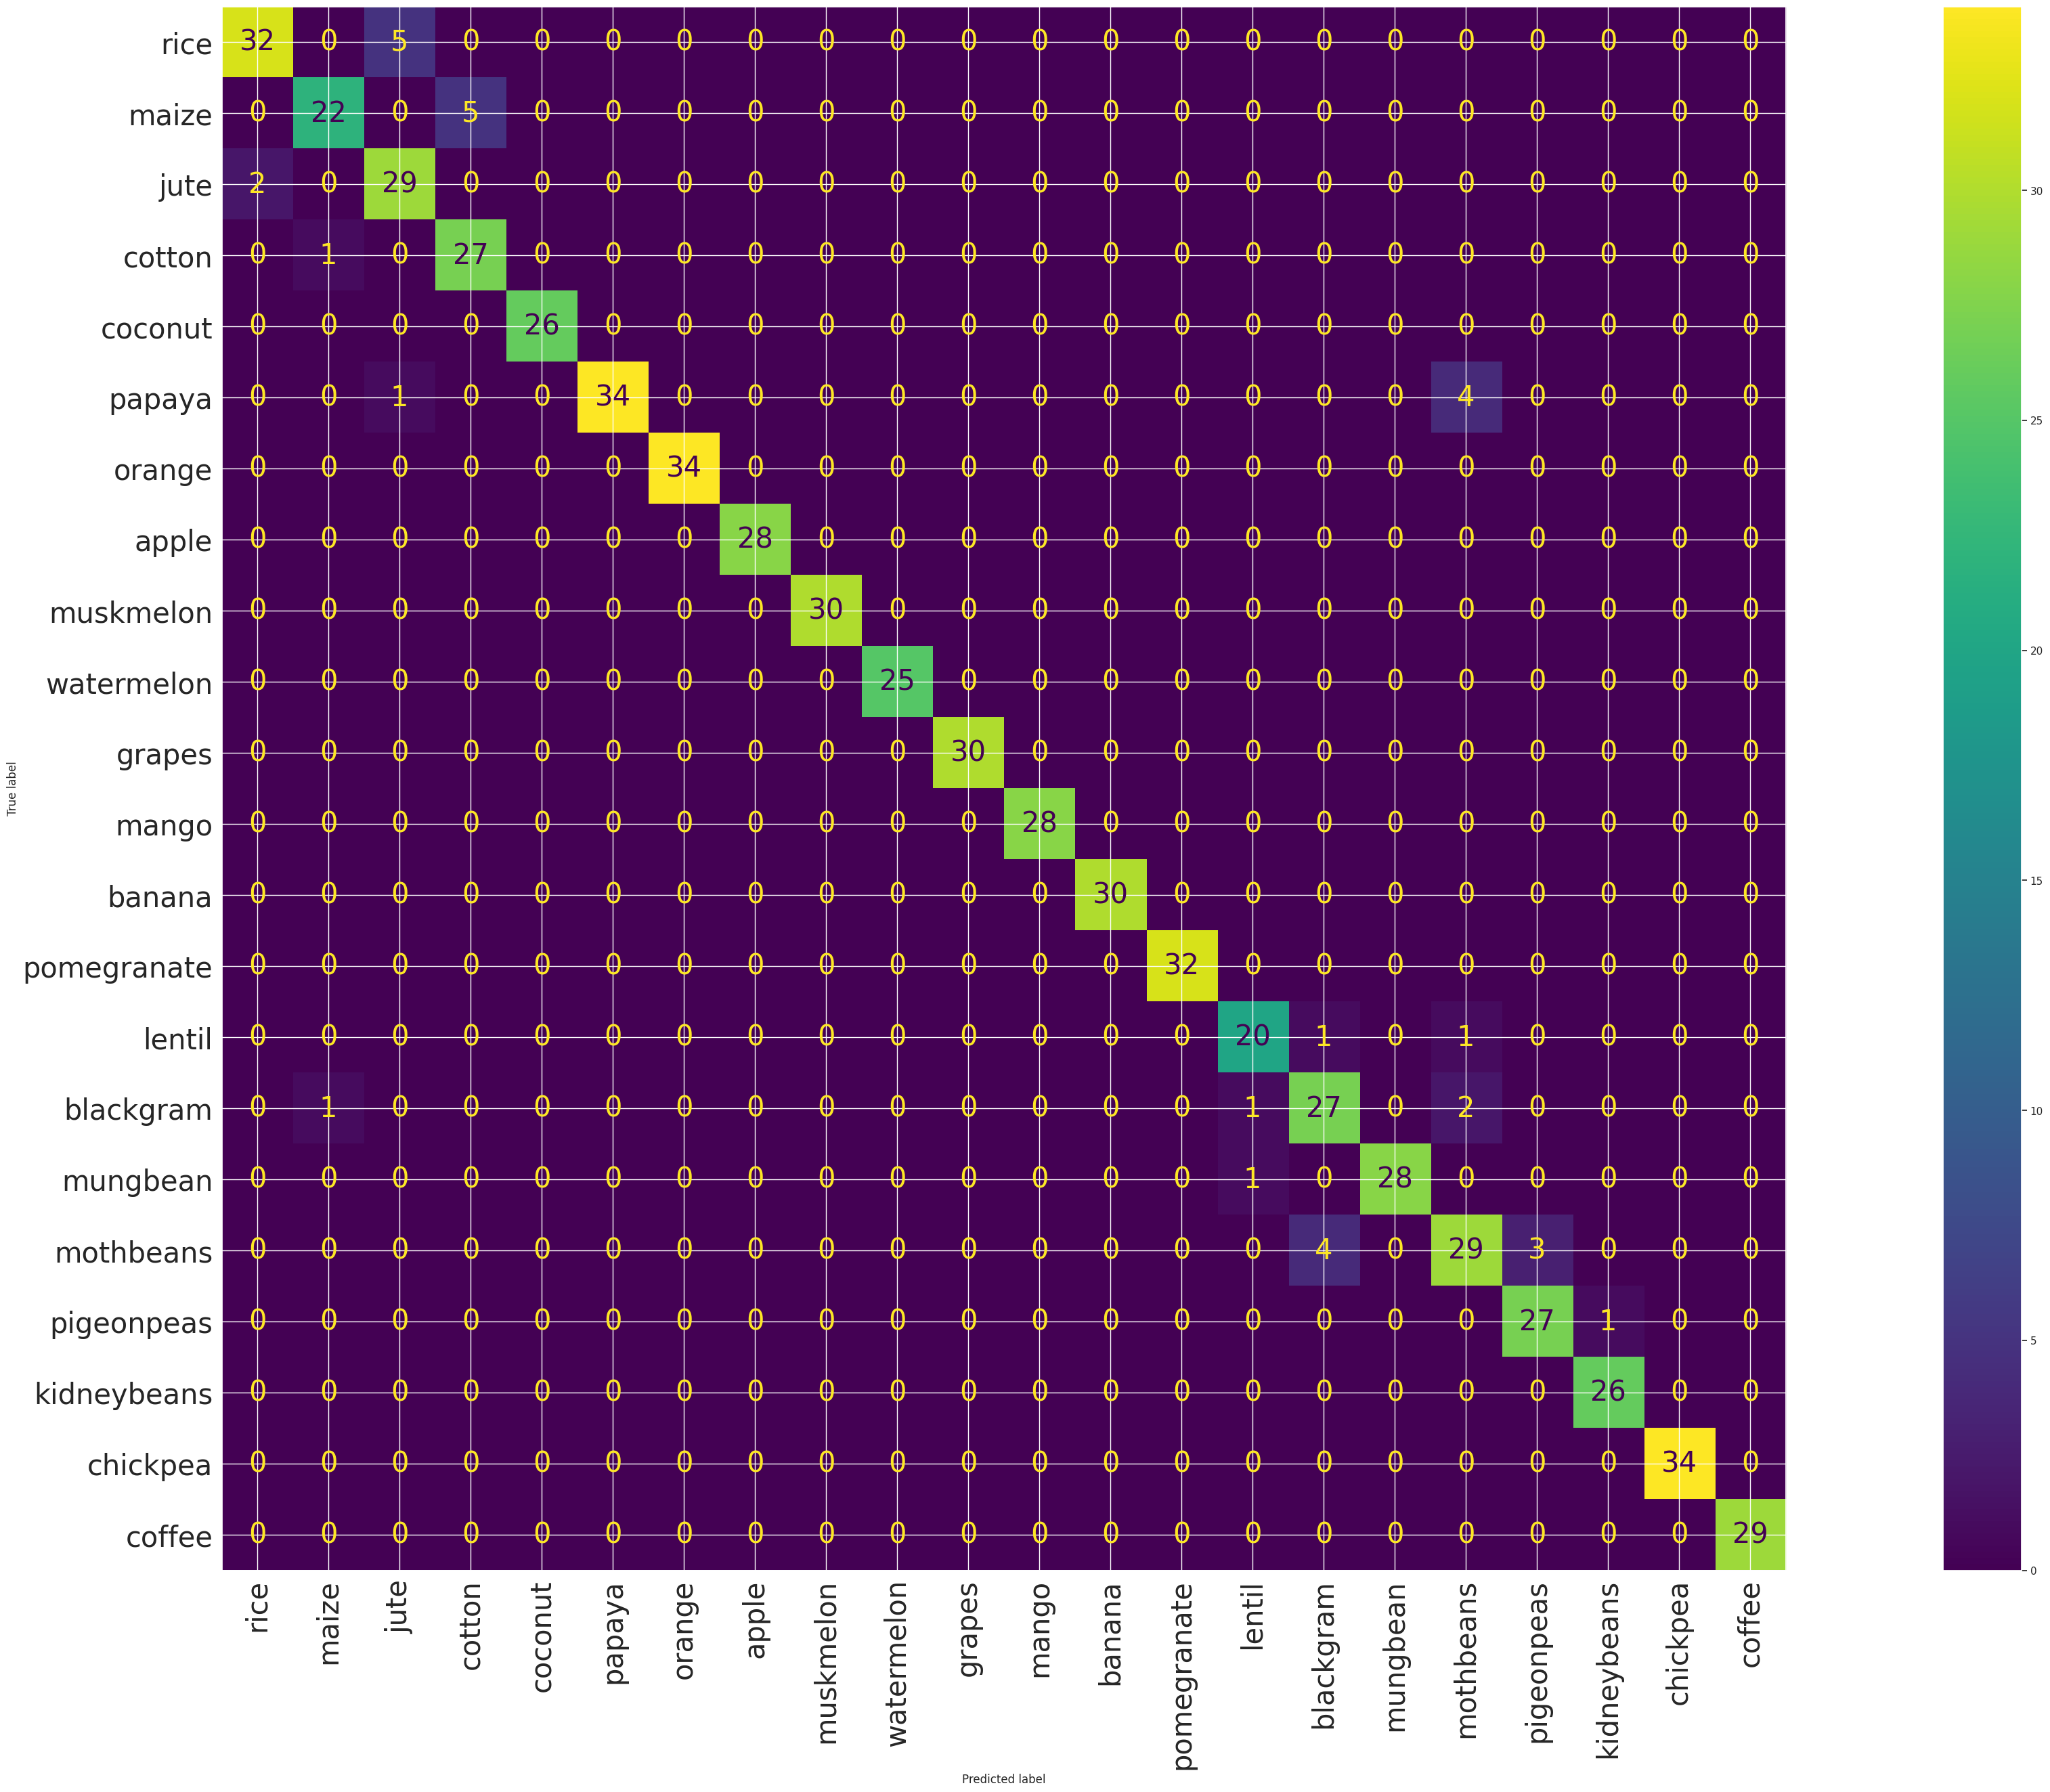

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana', 'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans', 'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee'])

fig, ax = plt.subplots(figsize=(60, 30))
cm_display.plot(ax=ax)

ax.set_xticklabels(cm_display.display_labels, fontsize=30, rotation=90)
ax.set_yticklabels(cm_display.display_labels, fontsize=30)

for text in cm_display.text_.ravel():
    text.set_fontsize(30)

plt.show()



**Confusion Matrix:**

In this confusion matrix,The diagonal values indecate the model predict correctly and the Off-diagonal values indicate misclassifications.for example, 1 instance of maize was misclassified as jute.Overall,the model exhibits strong performance in classifying all the crops.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred1, average='macro')
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred1, average='macro')
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred1, average='macro')
print("F1-Score:", f1)

Precision: 0.9523419997016253
Recall (Sensitivity): 0.9530300590443175
F1-Score: 0.9518572862371322
